# Production Budget vs Profit Margin #

An important part to any movie studio is how much they should be spending on their films.

While not the only factor to turning a profit in the movie industry, what is the correlation between production budget and profit margin?

The minimum we expect to answer here is:

### If Microsoft spends x amount more, will profits increase by y? ###

We will explore this question using the data set from the-numbers.com, a Los Angeles based database tracking the numbers that go into major-motion pictures.

### Import relevant libraries ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Import The Numbers dataset ##

In [2]:
df = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col='id')

In [3]:
print(f"""The first movie in the data set was released in {df['release_date'].min()} while the most recent was released in {df['release_date'].max()}""")

The first movie in the data set was released in Apr 1, 1975 while the most recent was released in Sep 9, 2016


The Numbers dataset contains information on about 5800 films, released from 1975 through 2016.
It is also the only data set to contain the films' budgets and grosses, while containing more relevant information than, say, the Box Office Mojo dataset, which only has about 3500 records.

In [4]:
# A sample of the dataframe
df.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
37,"Sep 5, 2008",Everybody Wants to Be Italian,"$3,000,000","$351,416","$351,416"
87,"Jun 25, 1968",La mariÃ©e Ã©tait en noir,"$747,000","$44,566","$44,566"
32,"Mar 25, 2005",Oldboy,"$3,000,000","$707,391","$6,239,723"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


## Data Cleaning and Organization ##

The next step is to clean and organize the data. This involves converting the numbers to floats, removing any "zero" values from the worldwide_gross column, and adding a "year" column.

For the purpose of this dataset, we will be filtering out anything made before the year 2000.

In [6]:
df['production_budget'] = df['production_budget'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['domestic_gross'] = df['domestic_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Now that we have raw numbers as floats, we can start working with our data.

Note: the worldwide_gross column is too large to display its whole numbers, hence the Scientific Notation.

In [7]:
# dropping all "0" values from the worldwide_gross column
df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan)
df = df.dropna()

<ipython-input-7-e18349e1590d>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan)


Now we'll add three columns:

Profit: this is the raw profit (worldwide gross - production budget).

ROI: this is being used as a "profit margin" column or a "percentage profit" column.

Release Year: What year did this film come out in.

In [8]:
df['profit'] = df['worldwide_gross'] - df['production_budget']

In [9]:
df['roi'] = round(((df['profit']/df['production_budget']) * 100), 2)

In [10]:
df['release_year'] = df['release_date'].map(lambda x: int(x[-4:]))

In [11]:
# let's check our df
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.26,2009
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.67,2011
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.21,2019
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.38,2015
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.37,2017


In [12]:
# quick check of the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5415 non-null   object 
 1   movie              5415 non-null   object 
 2   production_budget  5415 non-null   float64
 3   domestic_gross     5415 non-null   float64
 4   worldwide_gross    5415 non-null   float64
 5   profit             5415 non-null   float64
 6   roi                5415 non-null   float64
 7   release_year       5415 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 380.7+ KB


## Initial Data Analysis ##

Let's check our statistics out and see what they have to tell us.

In [13]:
df.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
count,5.415000e+03,5.415000e+03,5.415000e+03,5.415000e+03,5415.000000,5415.000000
mean,3.330801e+07,4.471128e+07,9.768800e+07,6.437999e+07,412.549117,2003.599446
std,4.248758e+07,6.960989e+07,1.788591e+08,1.498581e+08,3048.742004,12.546965
min,1.100000e+03,0.000000e+00,2.600000e+01,-2.002376e+08,-100.000000,1915.000000
25%,6.000000e+06,3.160708e+06,7.004834e+06,-1.862082e+06,-29.895000,1999.000000
50%,1.900000e+07,2.030022e+07,3.333987e+07,1.190000e+07,88.490000,2006.000000
75%,4.200000e+07,5.578249e+07,1.044590e+08,6.737924e+07,296.875000,2012.000000
max,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,179900.000000,2019.000000


Ok, we can see there is currently 5,415 records. The average production budget is 33m, while the median is 19m.

The Standard Deviation is massive though. Let's start filtering out data.

## Data Filtering ##

In [14]:
# let's start with the year.
# Anything older than the year 2005 will be removed, so we have a 10 year scope, using the last decade.
filtered_df = df[df['release_year'] >= 2005]

In [15]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3070 non-null   object 
 1   movie              3070 non-null   object 
 2   production_budget  3070 non-null   float64
 3   domestic_gross     3070 non-null   float64
 4   worldwide_gross    3070 non-null   float64
 5   profit             3070 non-null   float64
 6   roi                3070 non-null   float64
 7   release_year       3070 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 215.9+ KB


In [16]:
lowest_film = df[(df['production_budget'] == df['production_budget'].min())]
lowest_film

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,179941.0,16358.27,2005


In [17]:
highest_film = df[(df['production_budget'] == df['production_budget'].max())]
highest_film

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.26,2009


We removed about 2400 records.

Let's first look at the range of production budgets

In [18]:
df_range = [filtered_df['production_budget'].min(),filtered_df['production_budget'].max()]
df_range

[1100.0, 425000000.0]

Pretty steep range of 1100 to 425,000,000.

Let's take a quick look at a histogram and boxplot of the data.

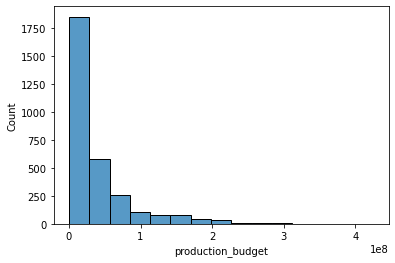

In [19]:
sns.histplot(data=filtered_df, x='production_budget',bins=15);

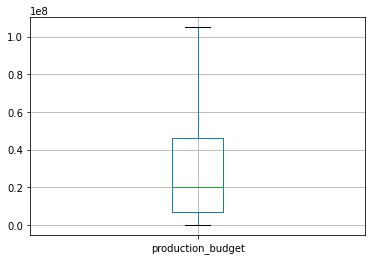

In [20]:
filtered_df.boxplot('production_budget', showfliers=False);

As we can see, our production budget in the data set is mostly left-skewed (each number is that number x 100m).

The boxplot tells us that most of the data really falls within the 100m area, with a median at 20m.

So, let's begin filtering further to remove some outliers.

In [21]:
filtered_df_mid = filtered_df[(filtered_df['production_budget'] >= 5000000) & (filtered_df['production_budget'] <= 150000000)]
filtered_df_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 55 to 86
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2339 non-null   object 
 1   movie              2339 non-null   object 
 2   production_budget  2339 non-null   float64
 3   domestic_gross     2339 non-null   float64
 4   worldwide_gross    2339 non-null   float64
 5   profit             2339 non-null   float64
 6   roi                2339 non-null   float64
 7   release_year       2339 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 164.5+ KB


In [22]:
# filtered_df['production_budget'].hist(), filtered_df_mid['production_budget'].hist();
# Does one on top of the other

In [23]:
# fig, axs = plt.subplots(1,2)
# filtered_df['production_budget'].hist(ax=axs[0],figsize=(18,5))
# filtered_df_mid['production_budget'].hist(ax=axs[1]);
# creates graphs next to each other

## Analyzing the Data ##

We're down to 2,339 records - great.

From a table of 5782 records, we've eliminated any movie from before 2005, and any movie outside a budget of 5m-150m.

For Microsoft to enter the film industry, what's a good production budget?

In [24]:
# first let's take another look at what we still have in filtered_df
filtered_df_mid.sample(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
42,"Jun 6, 2008",Kung Fu Panda,130000000.0,215434591.0,631910531.0,501910531.0,386.09,2008
20,"Aug 30, 2013",Getaway,18000000.0,10501938.0,11813989.0,-6186011.0,-34.37,2013
52,"Mar 4, 2005",Be Cool,75000000.0,55849401.0,94944017.0,19944017.0,26.59,2005
76,"Sep 22, 2017",Battle of the Sexes,25000000.0,12638526.0,18445379.0,-6554621.0,-26.22,2017
40,"Oct 16, 2015",CÃ¬kÃ¨ NiÃ¨ YinniÃ¡ng,15000000.0,632542.0,11279884.0,-3720116.0,-24.80,2015


In [25]:
# basic correlation between the variables
filtered_df_mid[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr()

,production_budget,worldwide_gross,profit,roi
production_budget,1.000000,0.667998,0.509603,-0.042601
worldwide_gross,0.667998,1.000000,0.980699,0.436856
profit,0.509603,0.980699,1.000000,0.516291
roi,-0.042601,0.436856,0.516291,1.000000


Let's also compare the outlier ranges of below 5 million and above 150 million.

In [26]:
filtered_df_low = filtered_df[(filtered_df['production_budget'] < 5000000)]
filtered_df_high = filtered_df[(filtered_df['production_budget'] > 15000000)]

In [27]:
filtered_df_low.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
8,"Apr 28, 2006",Water,3000000.0,5529144.0,11322573.0,8322573.0,277.42,2006
78,"Feb 3, 2012",The Innkeepers,750000.0,78396.0,1011535.0,261535.0,34.87,2012
35,"Jun 7, 2019",Late Night,4000000.0,246305.0,246305.0,-3753695.0,-93.84,2019


In [28]:
filtered_df_high.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
71,"Nov 7, 2008",Madagascar: Escape 2 Africa,150000000.0,180174880.0,599680774.0,449680774.0,299.79,2008
50,"Aug 13, 2008",Tropic Thunder,90000000.0,110515313.0,191145256.0,101145256.0,112.38,2008
30,"Mar 26, 2010",How to Train Your Dragon,165000000.0,217581232.0,494870992.0,329870992.0,199.92,2010


In [29]:
#print('low:',filtered_df_low[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr(), '\n\n',
     # 'mid:',filtered_df_mid[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr(), '\n\n',
     # 'high:',filtered_df_high[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr())

In [30]:
filtered_df_low[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr()

,production_budget,worldwide_gross,profit,roi
production_budget,1.000000,0.164270,0.092844,-0.118004
worldwide_gross,0.164270,1.000000,0.997406,0.558965
profit,0.092844,0.997406,1.000000,0.572826
roi,-0.118004,0.558965,0.572826,1.000000


In [31]:
filtered_df_mid[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr()

,production_budget,worldwide_gross,profit,roi
production_budget,1.000000,0.667998,0.509603,-0.042601
worldwide_gross,0.667998,1.000000,0.980699,0.436856
profit,0.509603,0.980699,1.000000,0.516291
roi,-0.042601,0.436856,0.516291,1.000000


In [32]:
filtered_df_high[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr()

,production_budget,worldwide_gross,profit,roi
production_budget,1.000000,0.760925,0.640865,0.102523
worldwide_gross,0.760925,1.000000,0.985735,0.553346
profit,0.640865,0.985735,1.000000,0.628079
roi,0.102523,0.553346,0.628079,1.000000


So, what we can see from the above correlations?

It appears in these ranges, the higher the budget the higher the profit. So, is spending an absurd amount of money the way to succesfully break into the film industry?

Let's keep digging.

## ROI ##

Using this as a stand-in for our profit margin, aka our profit percentage, let's look at the statistics on the ROI for each of these groups.

In [33]:
filtered_df_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       586 non-null    object 
 1   movie              586 non-null    object 
 2   production_budget  586 non-null    float64
 3   domestic_gross     586 non-null    float64
 4   worldwide_gross    586 non-null    float64
 5   profit             586 non-null    float64
 6   roi                586 non-null    float64
 7   release_year       586 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 41.2+ KB


In [34]:
filtered_df_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 55 to 86
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2339 non-null   object 
 1   movie              2339 non-null   object 
 2   production_budget  2339 non-null   float64
 3   domestic_gross     2339 non-null   float64
 4   worldwide_gross    2339 non-null   float64
 5   profit             2339 non-null   float64
 6   roi                2339 non-null   float64
 7   release_year       2339 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 164.5+ KB


In [35]:
filtered_df_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 1 to 91
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1754 non-null   object 
 1   movie              1754 non-null   object 
 2   production_budget  1754 non-null   float64
 3   domestic_gross     1754 non-null   float64
 4   worldwide_gross    1754 non-null   float64
 5   profit             1754 non-null   float64
 6   roi                1754 non-null   float64
 7   release_year       1754 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 123.3+ KB


In [36]:
print(f"""We're going to look at the three different DataFrames and their means, medians and standard deviations. We'll also check their ranges. \n\n
Low end mean: {round(filtered_df_low['roi'].mean(), 2)}, Low end median: {round(filtered_df_low['roi'].median(), 2)}, Low end standard deviation: {round(filtered_df_low['roi'].std(), 2)}, Low end range is {round(filtered_df_low['roi'].min(), 2)} to {round(filtered_df_low['roi'].max(), 2)}. \n\n
Medium range mean: {round(filtered_df_mid['roi'].mean(), 2)}, Medium range median: {filtered_df_mid['roi'].median()}, Medium standard deviation: {round(filtered_df_mid['roi'].std(), 2)}, Medium range is {round(filtered_df_mid['roi'].min(), 2)} to {round(filtered_df_mid['roi'].max(), 2)}. \n\n
High end mean: {round(filtered_df_high['roi'].mean(), 2)}. High end median: {filtered_df_high['roi'].median()}, High end standard deviation: {round(filtered_df_high['roi'].std(), 2)}, High end range is {round(filtered_df_high['roi'].min(), 2)} to {round(filtered_df_high['roi'].max(), 2)}.""")

We're going to look at the three different DataFrames and their means, medians and standard deviations. We'll also check their ranges. 


Low end mean: 542.79, Low end median: -24.09, Low end standard deviation: 2826.7, Low end range is -100.0 to 43051.79. 


Medium range mean: 194.7, Medium range median: 92.12, Medium standard deviation: 402.61, Medium range is -99.99 to 5479.3. 


High end mean: 169.06. High end median: 109.31, High end standard deviation: 245.66, High end range is -99.95 to 2031.76.


These are some funky numbers to say the least. What do the charts tell us about the distribution of the ROIs?

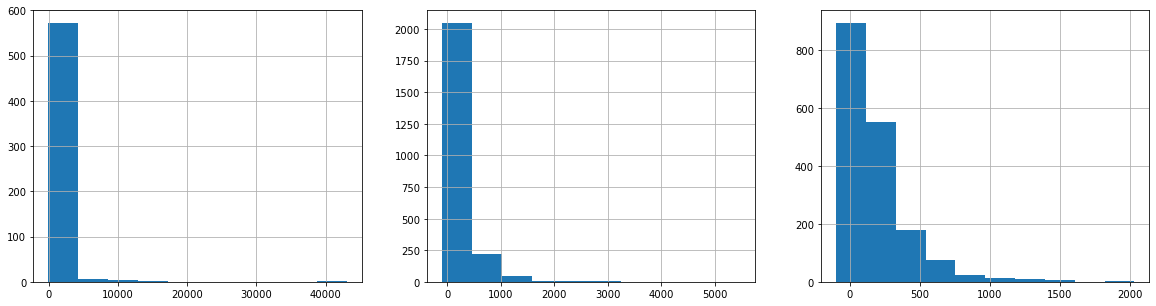

In [37]:
fig, axs = plt.subplots(1,3)
filtered_df_low['roi'].hist(ax=axs[0],figsize=(20,5))
filtered_df_mid['roi'].hist(ax=axs[1],figsize=(20,5))
filtered_df_high['roi'].hist(ax=axs[2],figsize=(20,5));

This confirms what we saw earlier:

All have fairly large ranges on their ROI, especially on the low end of budgets.

Let's start by getting rid of any outlier that is outside of 2 standard deviations of the mean, which will virtuall eliminate all extreme outliers, but keep the data within a reasonable range.

Afterwards, we'll build another histogram matrix to see if we're seeing anything better.

In [38]:
low_st = round((filtered_df_low['roi'].std()) * 2, 2)
mid_st = round((filtered_df_mid['roi'].std()) * 2, 2)
high_st = round((filtered_df_high['roi'].std()) * 2, 2)
low_mean = round(filtered_df_low['roi'].mean(), 2)
mid_mean = round(filtered_df_mid['roi'].mean(), 2)
high_mean = round(filtered_df_high['roi'].mean(), 2)

low_dev_min = (low_mean-low_st)
low_dev_max = (low_mean+low_st)
mid_dev_min = (mid_mean-mid_st)
mid_dev_max = (mid_mean+mid_st)
high_dev_min = (high_mean-high_st)
high_dev_max = (high_mean+high_st)

In [39]:
filtered_df_low = filtered_df_low[(filtered_df_low['roi'] >= low_dev_min) & (filtered_df_low['roi'] <= low_dev_max)]
filtered_df_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1 to 80
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       576 non-null    object 
 1   movie              576 non-null    object 
 2   production_budget  576 non-null    float64
 3   domestic_gross     576 non-null    float64
 4   worldwide_gross    576 non-null    float64
 5   profit             576 non-null    float64
 6   roi                576 non-null    float64
 7   release_year       576 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 40.5+ KB


In [40]:
filtered_df_low.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
1,"Jan 23, 2015",Mommy,4900000.0,3498695.0,17536004.0,12636004.0,257.88,2015
2,"Aug 29, 2008",Obsluhoval jsem anglickÃ©ho krÃ¡le,4900000.0,617228.0,7174984.0,2274984.0,46.43,2008
3,"Aug 20, 2010",Soul Kitchen,4900000.0,276901.0,23347461.0,18447461.0,376.48,2010
4,"Aug 17, 2012",The Awakening,4900000.0,95933.0,6924321.0,2024321.0,41.31,2012
5,"Jan 18, 2008",All Hat,4900000.0,15198.0,15198.0,-4884802.0,-99.69,2008


In [41]:
filtered_df_mid = filtered_df_mid[(filtered_df_mid['roi'] >= mid_dev_min) & (filtered_df_mid['roi'] <= mid_dev_max)]

In [42]:
filtered_df_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 55 to 86
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2267 non-null   object 
 1   movie              2267 non-null   object 
 2   production_budget  2267 non-null   float64
 3   domestic_gross     2267 non-null   float64
 4   worldwide_gross    2267 non-null   float64
 5   profit             2267 non-null   float64
 6   roi                2267 non-null   float64
 7   release_year       2267 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 159.4+ KB


In [43]:
filtered_df_high = filtered_df_high[(filtered_df_high['roi'] >= high_dev_min) & (filtered_df_high['roi'] <= high_dev_max)]

In [44]:
filtered_df_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 1 to 91
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1675 non-null   object 
 1   movie              1675 non-null   object 
 2   production_budget  1675 non-null   float64
 3   domestic_gross     1675 non-null   float64
 4   worldwide_gross    1675 non-null   float64
 5   profit             1675 non-null   float64
 6   roi                1675 non-null   float64
 7   release_year       1675 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 117.8+ KB
